In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('Advertising.csv')
df = df.iloc[:, 1:len(df)]
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### 📊 Veri Setinin İçeriği
Veri seti, her satırı bir reklam kampanyasını temsil eden ve aşağıdaki sütunları içeren 200 gözlemden oluşmaktadır:​

* TV: Televizyon reklamlarına yapılan harcama (bin dolar cinsinden)

* Radio: Radyo reklamlarına yapılan harcama (bin dolar cinsinden)

* Newspaper: Gazete reklamlarına yapılan harcama (bin dolar cinsinden)

* Sales: Yapılan satış miktarı (bin birim cinsinden)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

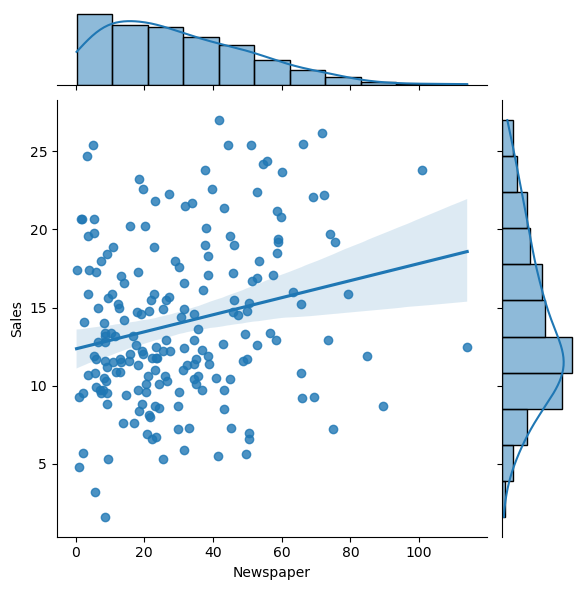

In [6]:
sns.jointplot(x='Newspaper', y='Sales', data=df, kind='reg');

In [7]:
X = df[['Newspaper']]
y = df['Sales']

reg = LinearRegression()

model = reg.fit(X, y)

In [9]:
model.intercept_, model.coef_[0]

(12.351407069278162, 0.05469309847227335)

In [10]:
model.score(X, y)

0.05212044544430516

Formul = **12.351407069278162 + 0.05469309847227335 . Newspaper**

(0.0, 30.0)

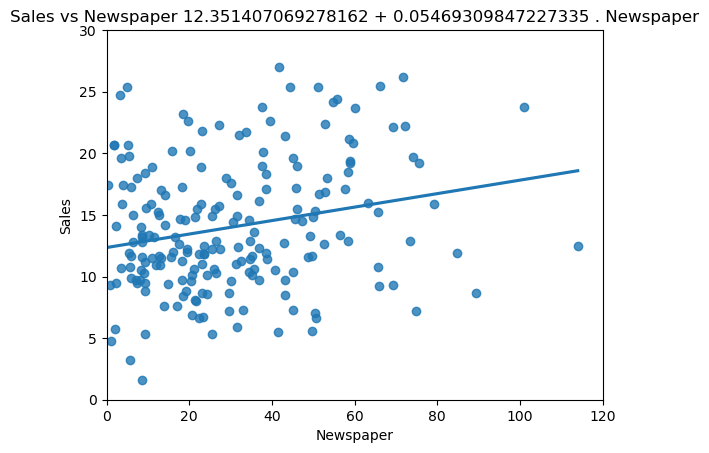

In [13]:
g = sns.regplot(x='Newspaper', y='Sales', data=df, ci=None)
g.set_title('Sales vs Newspaper 12.351407069278162 + 0.05469309847227335 . Newspaper')
g.set_xlabel('Newspaper')
g.set_ylabel('Sales')
plt.xlim(0, 120)
plt.ylim(0, 30)

In [15]:
## ARTIKLAR

In [20]:
gercek_y = y.head(10)
tahmin_y = pd.DataFrame(model.predict(X)[0:10])

hatalar = pd.concat([gercek_y, tahmin_y], axis=1)
hatalar.columns = ['GercekNP', 'TahminNP']

hatalar

,GercekNP,TahminNP
0,22.1,16.136169
1,10.4,14.818066
2,9.3,16.141639
3,18.5,15.550953
4,12.9,15.545484
5,7.2,16.453389
6,11.8,13.636695
7,13.2,12.985847
8,4.8,12.406100
9,10.6,13.510901


In [21]:
hatalar['Hata'] = hatalar['GercekNP'] - hatalar['TahminNP']
hatalar

,GercekNP,TahminNP,Hata
0,22.1,16.136169,5.963831
1,10.4,14.818066,-4.418066
2,9.3,16.141639,-6.841639
3,18.5,15.550953,2.949047
4,12.9,15.545484,-2.645484
5,7.2,16.453389,-9.253389
6,11.8,13.636695,-1.836695
7,13.2,12.985847,0.214153
8,4.8,12.406100,-7.606100
9,10.6,13.510901,-2.910901


In [22]:
#MAE
hataMAE = np.mean(np.abs(hatalar['Hata']))
hataMAE

4.46393040615372

In [23]:
#MSE
hataMSE = np.mean(hatalar['Hata']**2)
hataMSE

27.29606922516093

In [24]:
#RMSE
hataRMSE = np.sqrt(hataMSE)
hataRMSE

5.2245640224961285

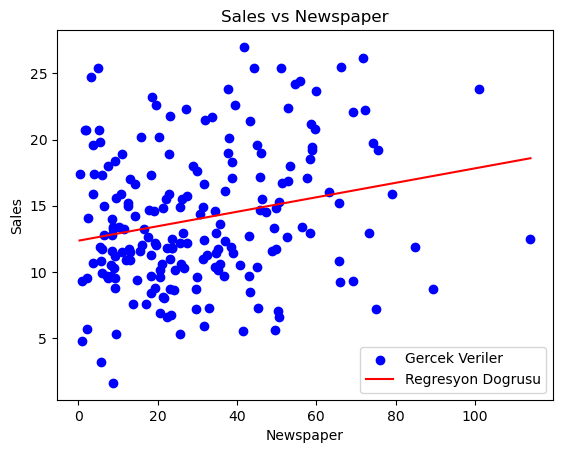

In [25]:
X_range = np.linspace(X.min(), X.max(), 100)

y_line = model.intercept_ + model.coef_[0] * X_range

plt.scatter(X, y, color='blue', label='Gercek Veriler')
plt.plot(X_range, y_line, color='red', label='Regresyon Dogrusu')
plt.title('Sales vs Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [26]:
model.intercept_, model.coef_[0], model.score(X, y)

(12.351407069278162, 0.05469309847227335, 0.05212044544430516)